# Проект: Исследование поведения пользователей сервиса аренды самокатов

# Описание проекта

Продакт-менеджеры компании хотят увеличить количество пользователей с подпиской, для этого планируется проведение различных акций. 

В нашем распоряжении данные о пользователях из нескольких городов, а также об их поездках и тарифах. Необходимо проанализировать эти данные и проверить гипотезы, которые могут помочь бизнесу. 

**Задачи проекта:**  
- провести предварительный анализ пользователей и их поездок;
- проанализировать поведение клиентов при использовании услуг;
- проверить статистические гипотезы;
- сделать выводы и дать рекомендации.


# Описание данных

Файл `users.csv` содержит данные о пользователях:
- `user_id` - уникальный идентификатор клиента;
- `name` - имя клиента;
- `age` - возраст;
- `city` - город;
- `subscription_type` - тип подписки.

Файл `rides.csv` содержит данные о поездках:
- `user_id` - уникальный идентификатор пользователя;
- `distance` - расстояние, которое пользователь проехал в текущей сессии (в метрах);
- `duration` - продолжительность сессии (в минутах) от нажатия «Начать поездку» до «Завершить поездку»;
- `date` - дата совершения поездки.

Файл `subscriptions.csv` содержит данные о подписках:
- `subscription_type` - тип подписки;
- `minute_price` - стоимость одной минуты поездки по типу подписки;
- `start_ride_price` - стоимость начала поездки;
- `subscription_fee` - стоимость ежемесячного платежа.
 

# План проекта

[1. Загрузка данных](#data_load)

	1.1. Загрузка библиотек
	1.2. Загрузка файлов
[2. Предобработка данных](#preprocessing)

	2.1. Общая предобработка
	2.2. Повышение качества данных
		2.2.1. Удаление дубликатов
		2.2.2. Изменение типа данных
	2.3. Обогащение данных
		2.3.1. Создание столбца с номером месяца
		2.3.2. Создание переменных
			2.3.2.1. Обогащенные данные ('data')
			2.3.2.2. Пользователи с подпиской ('subscription_ultra')
			2.3.2.3. Пользователи без подписки ('subscription_free')           
[3. Исследовательский анализ данных](#analysis)

	3.1. Пользователи сервиса
		3.1.1. Распределение пользователей по городам
		3.1.2. Распределение пользователей по типу подписки
		3.1.3. Распределение возраста пользователей
	3.2. Совершенные поездки
		3.2.1. Дистанция поездки
		3.2.2. Длительность поездки¶
	3.3. Поездки пользователей с разным типом подписки
		3.3.1. Дистанция поездки
		3.3.2. Длительность поездки
		3.3.3. Количество поездок
			3.3.3.1. Общее количество поездок у каждого пользователя
			3.3.3.2. Количество поездок в месяц
    3.4. Ежемесечная выручка            
[4. Проверка гипотез](#hypotheses)

	4.1. Гипотеза "Средняя длительность поездок"
	4.2. Гипотеза "Оптимальное расстояние поездок"
	4.3. Гипотеза "Помесячная выручка"   
[5. Заключение](#conclusion)

# 1. Загрузка данных <a id="#data_load"></a> 

## 1.1. Загрузка библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from IPython.display import display

## 1.2. Загрузка файлов

In [2]:
users = pd.read_csv('users.csv', sep=',')
users.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [3]:
rides = pd.read_csv('rides.csv', sep=',')
rides.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [4]:
subscriptions = pd.read_csv('subscriptions.csv', sep=',')
subscriptions

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


# 2. Предобработка данных <a id="#preprocessing"></a> 

## 2.1. Общая предобработка

Применим функцию, которая выведет общую информацию, количество пропусков и дубликатов.

In [5]:
def preprocessing(x):
    print('Общая информация:')
    display(x.info())

    print('Количество пропусков:')
    display(x.isna().sum())
    
    print('Наличие дубликатов:')
    display(x.duplicated().sum())

In [6]:
preprocessing(users);

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

Количество пропусков:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Наличие дубликатов:


31

In [7]:
preprocessing(rides);

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

Количество пропусков:


user_id     0
distance    0
duration    0
date        0
dtype: int64

Наличие дубликатов:


0

In [8]:
preprocessing(subscriptions);

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

Количество пропусков:


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Наличие дубликатов:


0

Пропуски в данных отсутствуют, однако был обнаружен 31 дубликат в данных о пользователях.

Кроме того, в разделе «rides» в столбце «date» тип данных не соответствует.

## 2.2. Повышение качества данных

### 2.2.1. Удаление дубликатов

Выведем id пользователей, записи о которых дублируются.

In [9]:
users.user_id.value_counts().head(31)

209     2
807     2
611     2
43      2
737     2
47      2
1198    2
829     2
924     2
153     2
635     2
72      2
909     2
908     2
136     2
1045    2
1237    2
127     2
659     2
307     2
1245    2
121     2
666     2
108     2
297     2
809     2
293     2
16      2
422     2
403     2
204     2
Name: user_id, dtype: int64

Рассмотрим несколько случайных пользователей из этого списка.

In [10]:
display(users[(users['user_id'] == 204)])
display(users[(users['user_id'] == 666)])
display(users[(users['user_id'] == 1198)])

,user_id,name,age,city,subscription_type
203,204,Руслан,30,Пятигорск,ultra
1542,204,Руслан,30,Пятигорск,ultra


,user_id,name,age,city,subscription_type
665,666,Зарина,29,Москва,ultra
1551,666,Зарина,29,Москва,ultra


,user_id,name,age,city,subscription_type
1197,1198,Демид,29,Ростов-на-Дону,free
1554,1198,Демид,29,Ростов-на-Дону,free


Возможно, это ошибка при сборе данных. Удалим выявленные дубликаты.

In [11]:
print('Пользователей до:', users.shape[0])
users = users.drop_duplicates()
print('Пользователей после:', users.shape[0])

Пользователей до: 1565
Пользователей после: 1534


### 2.2.2. Изменение типа данных

Изменим тип данных в столбце 'date'.

In [12]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


## 2.3. Обогащение данных

### 2.3.1. Создание столбца с номером месяца

Добавим в 'rides' столбец 'month_number' для указания номера месяца.

In [13]:
rides['month_number'] = rides['date'].dt.month
rides.sample(10)

,user_id,distance,duration,date,month_number
1037,111,3774.559883,24.098240,2021-07-30,7
8341,836,3400.949718,12.275317,2021-08-24,8
9211,902,3448.641921,19.794568,2021-04-07,4
6190,665,2421.985355,22.687941,2021-01-01,1
16816,1444,2609.576349,22.044199,2021-07-30,7
4199,452,4674.960486,27.763033,2021-11-07,11
15448,1351,1066.169039,16.205867,2021-10-30,10
16956,1456,4955.645677,17.866937,2021-03-12,3
6271,671,2989.513370,17.174832,2021-12-21,12
12850,1163,413.580537,5.378602,2021-12-19,12


Проверим, за какой период у нас имеются данные о поездках.

In [14]:
rides.date.agg({'min','max'})

min   2021-01-01
max   2021-12-30
Name: date, dtype: datetime64[ns]

### 2.3.2. Создание переменных

Для исследования нам понадобятся более подробные и обогащенные данные, для этого создадим несколько новых переменных.

In [15]:
print('Объединим пользователей, тип подписки и их поездки для дальнейшего анализа')
print('В исходных данных у нас было', users.shape[0], 'пользователя и', rides.shape[0],'поездок')
print('После объединения у нас должно остаться такое же количество')

Объединим пользователей, тип подписки и их поездки для дальнейшего анализа
В исходных данных у нас было 1534 пользователя и 18068 поездок
После объединения у нас должно остаться такое же количество


### 2.3.2.1. Обогащенные данные ('data')

Чтобы создать новую переменную с именем "data", объединим "users", "rides" и "subscriptions".

In [16]:
data = users.merge(rides, on='user_id', how='outer')
data = data.merge(subscriptions, on='subscription_type', how='outer')

Проверим, что всё прошло успешно и потерь данных после объединения нет.

In [17]:
display(data.sample(5))

print('Количество строк после объединения:', data.shape[0])
print('Количество пользователей после объединения:', data['user_id'].nunique())

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
7206,748,Борис,25,Москва,free,2106.123079,8.680274,2021-09-23,9,8,50,0
7486,770,Снежана,27,Краснодар,free,574.701419,4.814847,2021-08-10,8,8,50,0
2514,266,Анастасия,22,Москва,ultra,4050.622194,20.126555,2021-11-20,11,6,0,199
12942,1170,Глеб,22,Ростов-на-Дону,free,3751.166693,15.253500,2021-11-07,11,8,50,0
5804,618,Родион,20,Ростов-на-Дону,ultra,3170.660464,29.294512,2021-02-11,2,6,0,199


Количество строк после объединения: 18068
Количество пользователей после объединения: 1534


Объединение прошло успешно.

### 2.3.2.2. Пользователи с подпиской ('subscription_ultra')

На основании обогащенных данных создадим новую переменную для пользователей, у которых оформлена подписка.

In [18]:
subscription_ultra = data[(data['subscription_type'] == 'ultra')]
display(subscription_ultra.head());

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199


### 2.3.2.3. Пользователи без подписки ('subscription_free')

Также создадим переменную для пользователей, у которых нет подписки.

In [19]:
subscription_free = data[(data['subscription_type'] == 'free')]
display(subscription_free.head());

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0


# 3. Исследовательский анализ данных <a id="analysis"></a> 

Проведем исследовательский анализ, где более подробно изучим общие данные о клиентах и их поездках. Затем проанализируем эти данные в зависимости от подписки.

Применим функцию, которая выведет общую числовую информацию и медианное значение.

In [20]:
def describe_info(x):
    print('Минимальное, максимальное и среднее значение:')
    display(x.describe().round(2))

    print('Медианное значение:')
    display(x.median().round(2))

## 3.1. Пользователи сервиса

### 3.1.1. Распределение пользователей по городам

Рассмотрим, в каких городах живут и пользуются сервисом пользователи, и визуализируем эти данные в виде линейного графика.

In [21]:
display(users['city'].value_counts(ascending = False))

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

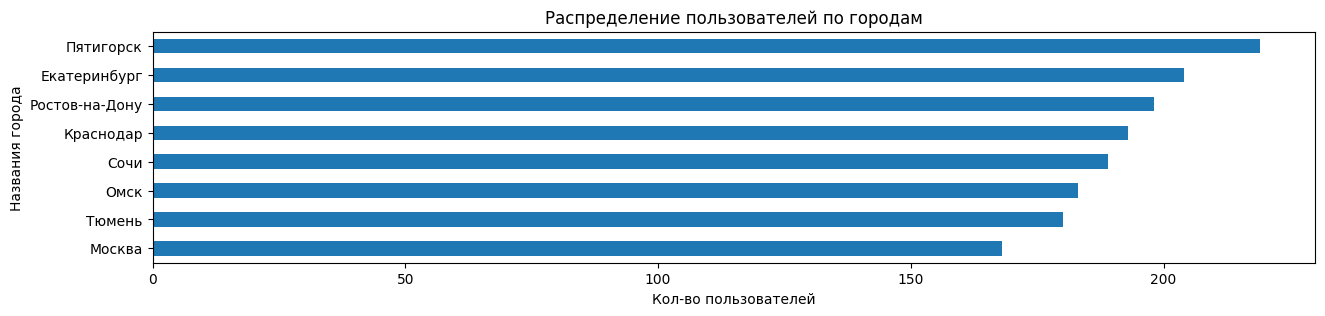

In [22]:
users['city'].value_counts(ascending = True).plot(kind = 'barh', figsize = (15,3))

plt.title('Распределение пользователей по городам')
plt.xlabel('Кол-во пользователей')
plt.ylabel('Названия города');

Из данных видим, что больше всего пользователей из Пятигорска — 219 человек. Меньше всего пользователей в Москве — 168 человек. Это довольно интересно, но разница не такая большая. Всего сервис используется в 8 городах России.

### 3.1.2. Распределение пользователей по типу подписки

Мы знаем, что мобильным приложение можно пользоваться:

- без подписки:
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;

- с подпиской Ultra:
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.

Сравним количество пользователей с подпиской и без нее.

In [23]:
display(users['subscription_type'].value_counts())

free     835
ultra    699
Name: subscription_type, dtype: int64

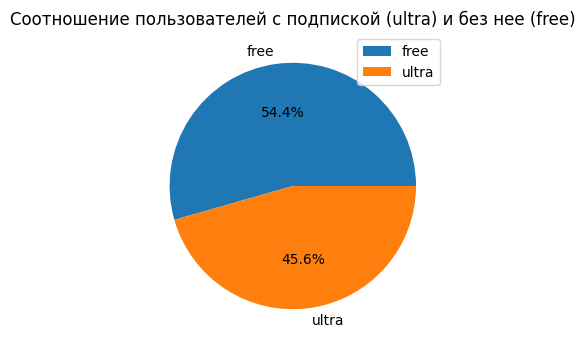

In [24]:
users['subscription_type'].value_counts().plot(kind='pie', figsize=(4,4), autopct='%1.1f%%', legend=True)

plt.title('Соотношение пользователей с подпиской (ultra) и без нее (free)')
plt.ylabel('');

Количество пользователей, не оформивших подписку, больше почти на 9%. Такой небольшой разрыв говорит о высокой популярности сервиса среди тех, кто предпочитает пользоваться платной подпиской, видимо, это выгодно.

Также изучим соотношение пользователей с подпиской и без в городах.

In [25]:
subscription_city = data.pivot_table(
    index='city',
    values ='name',
    columns ='subscription_type', 
    aggfunc='count'
).reset_index()

subscription_city['percentage_sub'] = (subscription_city['ultra'] / subscription_city['free'] * 100).round(2)
subscription_city.columns = ['city', 'free', 'ultra', 'percentage_sub']

subscription_city

,city,free,ultra,percentage_sub
0,Екатеринбург,1585,876,55.27
1,Краснодар,1521,780,51.28
2,Москва,1175,700,59.57
3,Омск,1250,827,66.16
4,Пятигорск,1672,852,50.96
5,Ростов-на-Дону,1565,885,56.55
6,Сочи,1446,813,56.22
7,Тюмень,1354,767,56.65


В большинстве городов соотношение примерно одинаковое. Однако в Омске пользователей с подпиской больше всего, а в Пятигорске — меньше всего.

### 3.1.3.  Распределение возраста пользователей

Изучим распределение возраста пользователей сервиса.

Минимальное, максимальное и среднее значение:


count    1534.00
mean       24.90
std         4.57
min        12.00
25%        22.00
50%        25.00
75%        28.00
max        43.00
Name: age, dtype: float64

Медианное значение:


25.0

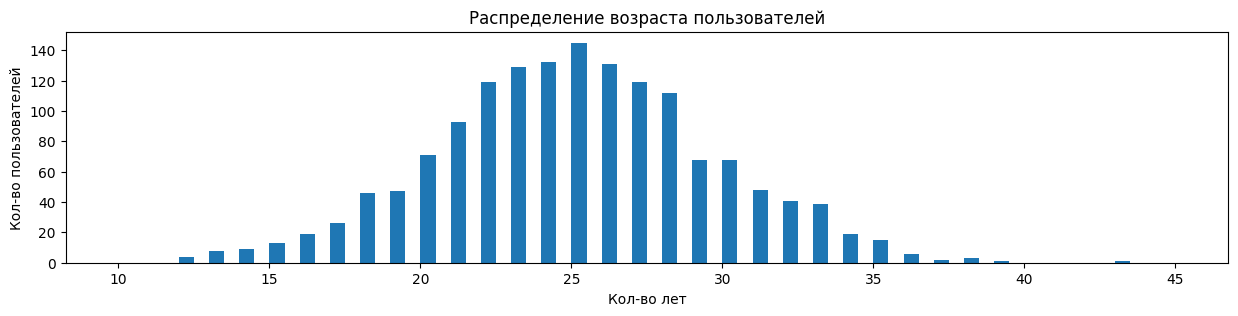

In [26]:
describe_info(users['age'])

users['age'].plot(
    kind='hist',
    range=(10, 45),
    bins=70, 
    linewidth=5, 
    alpha=1.0, 
    figsize=(15,3),
)

plt.title('Распределение возраста пользователей')
plt.xlabel('Кол-во лет')
plt.ylabel('Кол-во пользователей');

Возраст большинства пользователей сервиса от 21 до 28 лет. Средний возраст — 25 лет. Самому младшему пользователю 12 лет, а самому старшему — 43 года.

## 3.2. Совершенные поездки

### 3.2.1. Дистанция поездки

Изучим, какое расстояние преодолевают пользователи за одну поездку.

Минимальное, максимальное и среднее значение:


count    18068.00
mean      3070.66
std       1116.83
min          0.86
25%       2543.23
50%       3133.61
75%       3776.22
max       7211.01
Name: distance, dtype: float64

Медианное значение:


3133.61

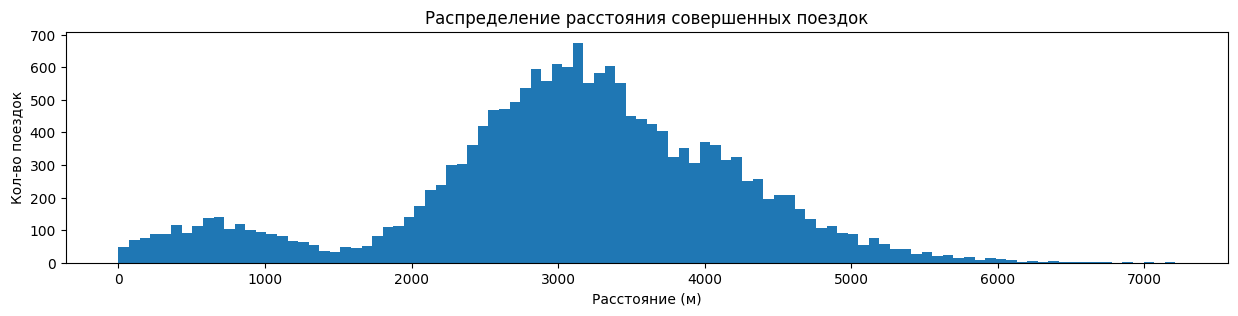

In [27]:
describe_info(rides['distance'])

rides['distance'].plot(
    kind='hist',
    bins=100, 
    linewidth=5, 
    alpha=1.0,
    figsize=(15,3)
)

plt.title('Распределение расстояния совершенных поездок')
plt.xlabel('Расстояние (м)')
plt.ylabel('Кол-во поездок');

На графике можно увидеть два разных пика: один от 0 до 1 км, а другой от 2 до 5 км. Самый высокий пик находится на уровне среднего значения в 3133 метра. При этом пользователи не проезжают больше 7 километров за один раз.

### 3.2.2. Длительность поездки

Также, как и с расстоянием, рассмотрим, сколько времени пользователи обычно тратят на поездку.

Минимальное, максимальное и среднее значение:


count    18068.00
mean        17.81
std          6.09
min          0.50
25%         13.60
50%         17.68
75%         21.72
max         40.82
Name: duration, dtype: float64

Медианное значение:


17.68

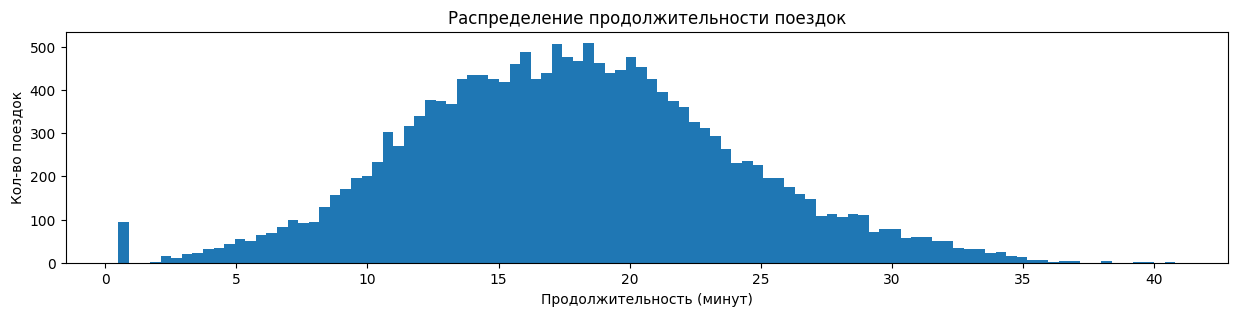

In [28]:
describe_info(rides['duration'])

rides['duration'].plot(kind='hist', bins=100, linewidth=5, alpha=1.0, figsize=(15,3))

plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минут)')
plt.ylabel('Кол-во поездок');

На графике заметен аномальный скачек примерно в 1 минуту, изучим его подробнее.

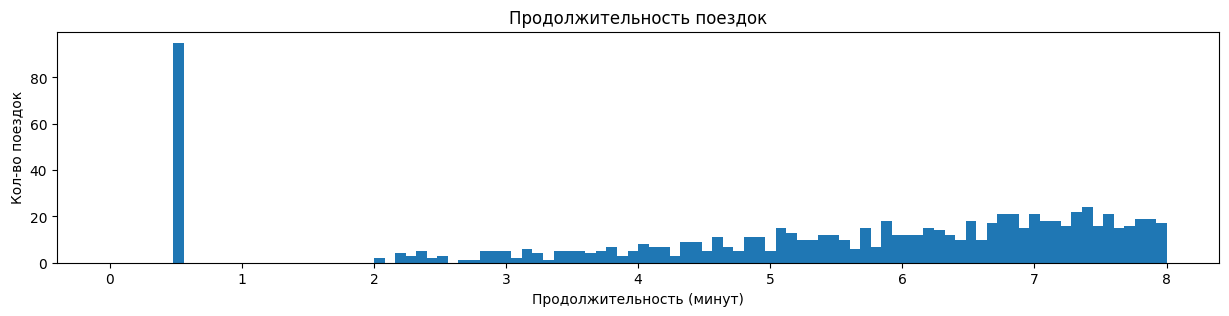

In [29]:
rides['duration'].plot(kind='hist', range=(0, 8), bins=100, linewidth=5, alpha=1.0, figsize=(15,3))

plt.title('Продолжительность поездок')
plt.xlabel('Продолжительность (минут)')
plt.ylabel('Кол-во поездок');

Странные поездки длились по 30 секунд, а всего таких поездок было 95. Возможно, это какие-то технические поездки или ошибки, которые не стоит учитывать в исследовании. Изучим их более подробно и узнаем, у какого типа подписки такие поездки были чаще.

In [30]:
print('Подписка:', data.query('duration == 0.5')['subscription_type'].value_counts())
print()
print('Пользователи совершившие такую поездку:', data.query('duration == 0.5')['user_id'].nunique())

Подписка: free    95
Name: subscription_type, dtype: int64

Пользователи совершившие такую поездку: 90


Все 95 поездок в 30 секунд только у 90 разных пользователей без подписки. Стоимость старта для пользователей без подписки составляет 50 рублей, возможно, при старте у них заканчивались деньги, либо такая стоимость поездки их напугала.

В среднем поездка у пользователей занимает почти 18 минут. Большинство пользователей проводят в дороге от 13 до 22 минут. Минимальный промежуток времени без аномалий составляет 2 минуты, а максимальный — 41 минуту.

## 3.3. Поездки пользователей с разным типом подписки

Рассмотрим, на какие расстояния и в течение какого времени перемещаются пользователи с разными типами подписки.

### 3.3.1. Дистанция поездки

Рассмотрим, какое расстояние преодолевают пользователи с подпиской во время своих поездок.

In [31]:
describe_info(subscription_ultra['distance'])

Минимальное, максимальное и среднее значение:


count    6500.00
mean     3115.45
std       836.90
min       244.21
25%      2785.44
50%      3148.64
75%      3560.57
max      5699.77
Name: distance, dtype: float64

Медианное значение:


3148.64

А также пользователей без подписки.

In [32]:
describe_info(subscription_free['distance'])

Минимальное, максимальное и среднее значение:


count    11568.00
mean      3045.50
std       1246.17
min          0.86
25%       2366.56
50%       3114.65
75%       3905.70
max       7211.01
Name: distance, dtype: float64

Медианное значение:


3114.65

Построим график и сравним распределение преодоленного расстояния между двумя группами пользователей.

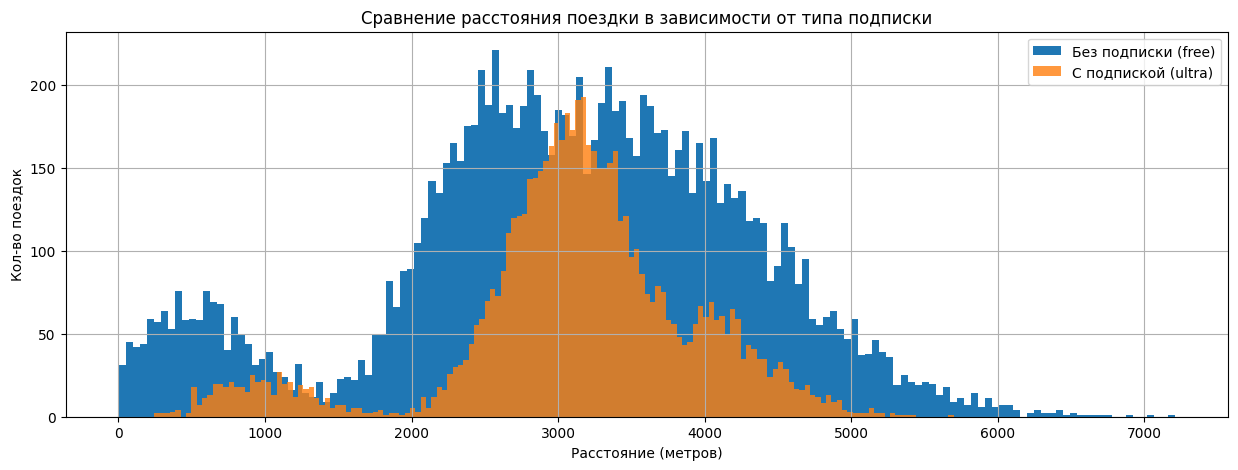

In [33]:
ax = subscription_free.plot(
    kind='hist',
    y='distance', 
    histtype='bar',
    bins=150,
    linewidth=5,
    alpha=1,
    label='Без подписки (free)',
    figsize=(15,5),
) 

subscription_ultra.plot(
    kind='hist',
    y='distance',
    histtype='bar',
    bins=150,
    linewidth=5,
    alpha=0.8,
    label='С подпиской (ultra)',
    ax=ax, 
    grid=True, 
    legend=True,
    figsize=(15,5),
)

plt.title('Сравнение расстояния поездки в зависимости от типа подписки')
plt.xlabel('Расстояние (метров)')
plt.ylabel('Кол-во поездок');

В целом показатели схожи, но есть некоторые отличия.

Если смотреть на числовые данные, то видно, что количество поездок у пользователей с подпиской и без подписки отличается почти в два раза. За определённый период времени пользователи без подписки совершили 11 568 поездок, а с подпиской — 6500 поездок.

Средняя продолжительность поездок тоже близка: пользователи с подпиской проезжают в среднем 3148 метров, а без подписки — 3114 метров. Однако заметно, что у пользователей с разными типами подписки есть большая разница между минимальной и максимальной продолжительностью поездки.

На графике мы видим два пика у пользователей без подписки: первый — в диапазоне от 0 до 1 километра, второй — от 2 до 5 километров. Максимальная продолжительность поездки составляет 7 километров. Пользователи без подписки также часто совершают небольшие поездки до одного километра. У пользователей с подпиской есть только один пик на графике, и они совершают поездки чаще всего на расстояние от 2,5 до 4 километров.

### 3.3.2. Длительность поездки

Рассмотрим продолжительность поездок пользователей с подпиской.

In [34]:
describe_info(subscription_ultra['duration'])

Минимальное, максимальное и среднее значение:


count    6500.00
mean       18.54
std         5.57
min         3.76
25%        14.52
50%        18.18
75%        21.88
max        40.82
Name: duration, dtype: float64

Медианное значение:


18.18

Продолжительность поездок пользователей без подписки.

In [35]:
describe_info(subscription_free['duration'])

Минимальное, максимальное и среднее значение:


count    11568.00
mean        17.39
std          6.33
min          0.50
25%         12.96
50%         17.33
75%         21.59
max         34.95
Name: duration, dtype: float64

Медианное значение:


17.33

Построим график и сравним распределение преодоленной дистанции с подпиской и без нее.

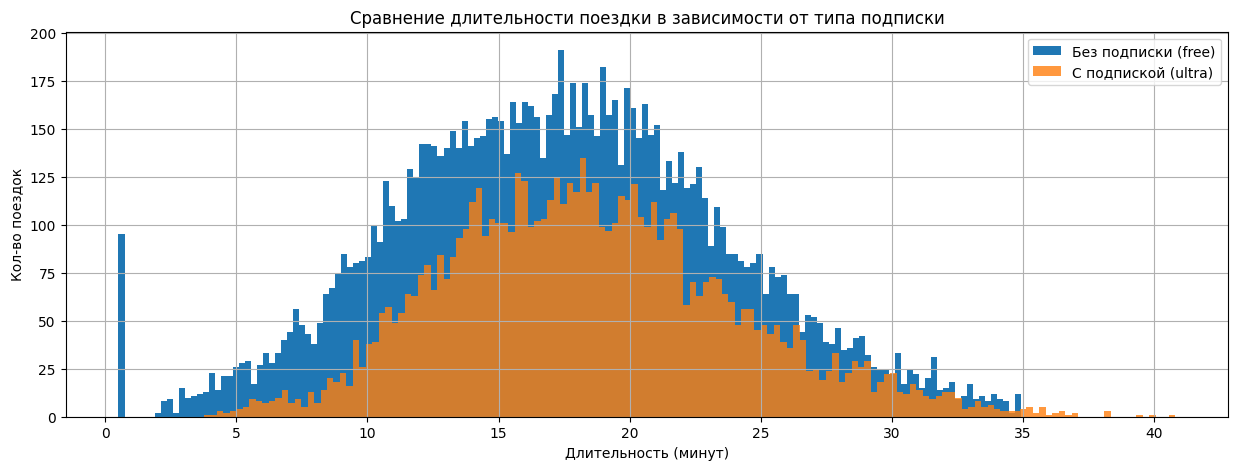

In [36]:
ax = subscription_free.plot(
    kind='hist',
    y='duration', 
    histtype='bar',
    bins=150,
    linewidth=5,
    alpha=1,
    label='Без подписки (free)',
    figsize=(15,5),
) 

subscription_ultra.plot(
    kind='hist',
    y='duration',
    histtype='bar',
    bins=150,
    linewidth=5,
    alpha=0.8,
    label='С подпиской (ultra)',
    ax=ax, 
    grid=True, 
    legend=True,
    figsize=(15,5),
)

plt.title('Сравнение длительности поездки в зависимости от типа подписки')
plt.xlabel('Длительность (минут)')
plt.ylabel('Кол-во поездок');

При изучении продолжительности поездок по типу подписки общий тренд сохраняется, но есть несколько интересных открытий.

Средняя продолжительность поездок у пользователей с подпиской составляет 18 минут, в то время как пользователи без подписки проезжают в среднем 17 минут за поездку. Важный момент, что пользователи с подпиской совершают более долгие поездки, до 40 минут, когда максимальная поездка пользователей без подписки составляет 35 минут.

Это говорит о том, что пользователи с бесплатной подпиской проезжают расстояние быстрее и, вероятно, менее внимательно относятся к состоянию самоката. В то время, как пользователи с подпиской более осторожны и аккуратны.

### 3.3.3. Количество поездок

### 3.3.3.1. Общее количество поездок у каждого пользователя

Узнаем общее количество поездок за всё время у каждого пользователя с подпиской.

In [37]:
ultra_count_rides = subscription_ultra.pivot_table(index='user_id', values='date', aggfunc='count').reset_index()
ultra_count_rides.columns = ['user_id', 'count_rides']

describe_info(ultra_count_rides['count_rides'])

Минимальное, максимальное и среднее значение:


count    699.00
mean       9.30
std        3.19
min        2.00
25%        7.00
50%        9.00
75%       11.00
max       21.00
Name: count_rides, dtype: float64

Медианное значение:


9.0

Узнаем общее количество поездок за всё время у каждого пользователя без подписки.

In [38]:
free_count_rides = subscription_free.pivot_table(index='user_id', values='date', aggfunc='count').reset_index()
free_count_rides.columns = ['user_id', 'count_rides']

describe_info(free_count_rides['count_rides'])

Минимальное, максимальное и среднее значение:


count    835.00
mean      13.85
std        3.71
min        4.00
25%       11.50
50%       14.00
75%       16.00
max       27.00
Name: count_rides, dtype: float64

Медианное значение:


14.0

Визуализируем данные и построим столбчатый график для наглядного сравнения.

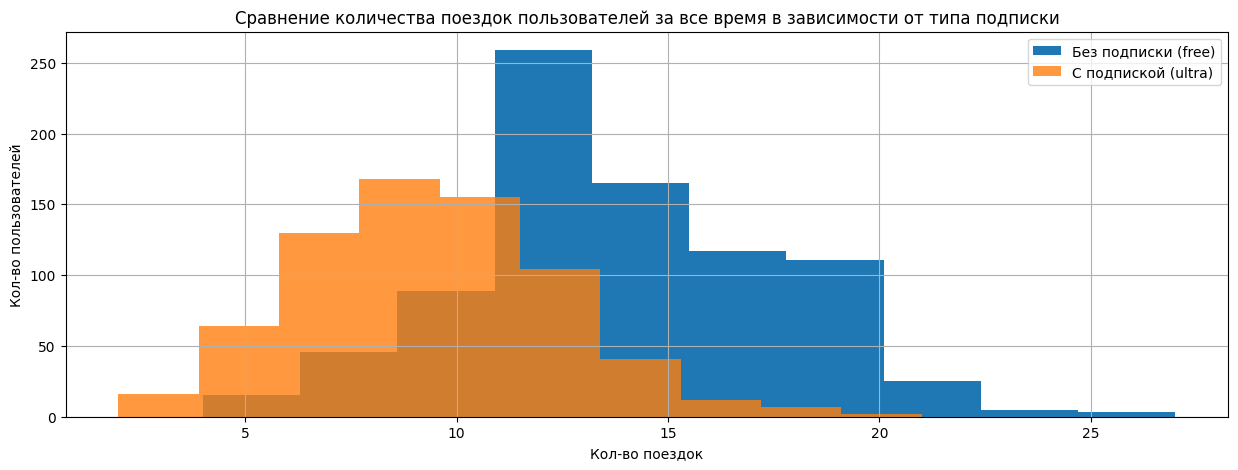

In [39]:
ax = free_count_rides.plot(
    kind='hist',
    y='count_rides', 
    histtype='bar',
    linewidth=5,
    alpha=1,
    label='Без подписки (free)',
    figsize=(15,5)
) 

ultra_count_rides.plot(
    kind='hist',
    y='count_rides',
    histtype='bar',
    linewidth=5,
    alpha=0.8,
    label='С подпиской (ultra)',
    ax=ax, 
    grid=True, 
    legend=True,
    figsize=(15,5)
)

plt.title('Сравнение количества поездок пользователей за все время в зависимости от типа подписки')
plt.xlabel('Кол-во поездок')
plt.ylabel('Кол-во пользователей');

Можно заметить, что пользователи без подписки совершают больше поездок, чем пользователи с подпиской. 

В среднем они совершают 14 поездок против 9. Также есть существенная разница в минимальном и максимальном количестве поездок: 4 против 2 и 27 против 21. 

Также изучим распределение количества поездок за каждый месяц, возможно, мы найдем что-нибудь важное для нашего исследования.

### 3.3.3.2. Количество поездок в месяц

Рассмотрим количество поездок пользователей с оформленной подпиской и без нее.

In [40]:
ultra_count_rides_month = subscription_ultra.pivot_table(index=['user_id', 'month_number'], values='date', aggfunc='count')
ultra_count_rides_month = ultra_count_rides_month.rename(columns={'date':'count_rides'})
describe_info(ultra_count_rides_month.count_rides)

Минимальное, максимальное и среднее значение:


count    4533.00
mean        1.43
std         0.70
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         6.00
Name: count_rides, dtype: float64

Медианное значение:


1.0

In [41]:
free_count_rides_month = subscription_free.pivot_table(index=['user_id', 'month_number'], values='date', aggfunc='count')
free_count_rides_month = free_count_rides_month.rename(columns={'date':'count_rides'})
describe_info(free_count_rides_month.count_rides)

Минимальное, максимальное и среднее значение:


count    6798.00
mean        1.70
std         0.89
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         7.00
Name: count_rides, dtype: float64

Медианное значение:


1.0

Видим, что обычно пользователи пользуются сервисом 1–2 раза. Пользователи с подпиской совершали максимум 7 поездок, а без нее — 6 поездок.

### 3.4. Ежемесячная выручка 

Для расчетов выручки округлим и перезапишем значения продолжительности поездок.

In [42]:
data['duration'] = np.ceil(data['duration'])
data['duration'] = data['duration'].astype(int)
data.sample(5)

,user_id,name,age,city,subscription_type,distance,duration,date,month_number,minute_price,start_ride_price,subscription_fee
2361,251,Василий,20,Сочи,ultra,2510.175651,21,2021-04-14,4,6,0,199
17655,1506,Регина,29,Сочи,free,3630.665228,21,2021-11-27,11,8,50,0
4472,482,Ясмина,22,Пятигорск,ultra,2809.149104,14,2021-10-29,10,6,0,199
12903,1167,Тамерлан,27,Москва,free,4225.588768,13,2021-09-30,9,8,50,0
6964,731,Алексей,28,Пятигорск,free,392.291179,14,2021-09-12,9,8,50,0


Создадим сводную таблицу, в которой объединим данные о пользователях и месяцах, в которые они совершали поездки. Затем подсчитаем общую дистанцию и продолжительность поездок за каждый месяц.

In [43]:
df_rides = data
df_rides['count_distance'] = df_rides['duration']
df_rides['month'] = df_rides['month_number']

df_rides = data.pivot_table(
    index = ['user_id', 'month_number'], 
    values = ['distance', 'count_distance','duration','subscription_type','month'],
    aggfunc = ({'distance':'sum','count_distance':'count','month_number':'count',\
                'duration':'sum','subscription_type':'max','month':'max'}))

df_rides.head(10)

count_distance      distance  duration  month  \
user_id month_number                                                  
1       1                          2   7027.511294        42      1   
        4                          1    754.159807         7      4   
        8                          2   6723.470560        46      8   
        10                         2   5809.911100        32     10   
        11                         3   7003.499363        56     11   
        12                         2   6751.629942        28     12   
2       3                          3  10187.723006        63      3   
        4                          2   6164.381824        40      4   
        6                          1   3255.338202        14      6   
        7                          2   6780.722964        48      7   

                      month_number subscription_type  
user_id month_number                                  
1       1                        2             ultra  
        4                        1             ultra  
        8                        2             ultra  
        10                       2             ultra  
        11                       3             ultra  
        12                       2             ultra  
2       3                        3             ultra  
        4                        2             ultra  
        6                        1             ultra  
        7                        2             ultra

Добавим столбец с ежемесячной выручкой, которую принес каждый пользователь.

In [44]:
def monthly_revenue(row):
    subscription_type = row['subscription_type']
    duration = row['duration']
    count_distance = row['count_distance']
    if subscription_type == 'ultra':
        return (6 * duration + 199)
    if subscription_type == 'free':
        return (8 * duration)+(count_distance * 50)
    
df_rides['monthly_revenue']  = df_rides.apply(monthly_revenue, axis = 1)

df_rides.head(10)

count_distance      distance  duration  month  \
user_id month_number                                                  
1       1                          2   7027.511294        42      1   
        4                          1    754.159807         7      4   
        8                          2   6723.470560        46      8   
        10                         2   5809.911100        32     10   
        11                         3   7003.499363        56     11   
        12                         2   6751.629942        28     12   
2       3                          3  10187.723006        63      3   
        4                          2   6164.381824        40      4   
        6                          1   3255.338202        14      6   
        7                          2   6780.722964        48      7   

                      month_number subscription_type  monthly_revenue  
user_id month_number                                                   
1       1                        2             ultra              451  
        4                        1             ultra              241  
        8                        2             ultra              475  
        10                       2             ultra              391  
        11                       3             ultra              535  
        12                       2             ultra              367  
2       3                        3             ultra              577  
        4                        2             ultra              439  
        6                        1             ultra              283  
        7                        2             ultra              487

Также изучим выручку в каждом месяце у каждой группы пользователей, посчитаем среднюю, минимальную и максимальную стоимость одной поездки в каждом месяце.

In [45]:
month_revenue = df_rides[['month', 'monthly_revenue', 'subscription_type']].reset_index(drop=True)
month_revenue = month_revenue.pivot_table(
    index='month',
    values='monthly_revenue',
    columns='subscription_type', aggfunc=['sum','median','min','max']
)
month_revenue

sum         median        min         max      
subscription_type    free   ultra   free ultra free ultra  free ultra
month                                                                
1                  193850  144108    266   343   58   235  1444   787
2                  165856  124572    250   331   58   241  1138   709
3                  187214  142608    276   331   58   241  1268   955
4                  185598  137318    284   337   82   235  1342   757
5                  188030  149235    266   331   58   235  1382   895
6                  192144  143834    274   337   58   235  1098   751
7                  185038  143466    263   337   58   241  1146   829
8                  187116  138534    274   331   58   235  1066   709
9                  193700  129337    298   343   58   235  1148   715
10                 181428  133932    292   325   58   229  1074   811
11                 179076  126546    270   331   58   247  1074   673
12                 195054  131047    266   337   58   223  1348   841

Разобраться в этой таблице достаточно сложно, выведем общую числовую информацию.

In [46]:
describe_info(month_revenue[['median','min','max']])

Минимальное, максимальное и среднее значение:


median           min              max        
subscription_type    free  ultra   free   ultra     free   ultra
count               12.00   12.0  12.00   12.00    12.00   12.00
mean               273.25  334.5  60.00  236.00  1210.67  786.00
std                 13.15    5.4   6.93    6.18   137.37   84.03
min                250.00  325.0  58.00  223.00  1066.00  673.00
25%                266.00  331.0  58.00  235.00  1092.00  713.50
50%                272.00  334.0  58.00  235.00  1147.00  772.00
75%                278.00  337.0  58.00  241.00  1343.50  832.00
max                298.00  343.0  82.00  247.00  1444.00  955.00

Медианное значение:


        subscription_type
median  free                  272.0
        ultra                 334.0
min     free                   58.0
        ultra                 235.0
max     free                 1147.0
        ultra                 772.0
dtype: float64

Также изучим общую сумму выручки за всё время от каждого типа подписки.

In [47]:
month_revenue[['sum']].sum()

     subscription_type
sum  free                 2234104
     ultra                1644537
dtype: int64

Суммарная выручка в каждой группе остаётся примерно одинаковой из месяца в месяц. Однако различия между группами довольно существенны, о чём говорит общая выручка за весь период.

Если посмотреть на среднюю, минимальную и максимальную выручку за поездку, то мы увидим, что у пользователей с подпиской средние значения выше — 334 против 272, минимальные суммы за поездку значительно больше — 235 против 58, а максимальные суммы значительно меньше — 772 против 1147, чем у пользователей без подписки.

# 4. Проверка гипотез <a id="hypotheses"></a> 

## 4.1. Гипотеза «Средняя длительность поездок»

Определим, проводят ли пользователи с платной подпиской больше времени в поездках. Если это так, то пользователи с подпиской могут быть более выгодными для компании.

**Нулевая гипотеза:** Пользователи с подпиской проводят столько же времени в поездках, сколько и пользователи без подписки.

**Альтернативная гипотеза:** Пользователи с подпиской тратят на поездки больше времени, чем пользователи без подписки.

In [48]:
duration_ultra = subscription_ultra['duration']
duration_free = subscription_free['duration']

alpha = 0.05

results = st.ttest_ind(duration_ultra, duration_free, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645613e-34
Отвергаем нулевую гипотезу


Перепроверим и  определим среднее время поездки для пользователей с подпиской и без неё.

In [49]:
print('Медиана данных с подпиской:', duration_ultra.median().round(2), 'минут')
print('Медиана данных без подписки:', duration_free.median().round(2), 'минут')

Медиана данных с подпиской: 18.18 минут
Медиана данных без подписки: 17.33 минут


**Вывод:** нулевая гипотеза была отвергнута. Это свидетельствует о том, что клиенты с подпиской, в среднем проезжают дольше, чем те, у кого подписки нет.

## 4.2. Гипотеза «Оптимальное расстояние поездок»

Оптимальное расстояние одной поездки с точки зрения износа самоката составляет 3130 метров. 

Определим, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимальное расстояние. 

**Нулевая гипотеза:** Пользователи с подпиской проезжают оптимальное расстояние в 3130 метров. 

**Альтернативная гипотеза:** Пользователи с подпиской проезжают большее расстояние, чем оптимальное в 3130 метров.

In [50]:
distance_ultra = subscription_ultra['distance']

best_distance = 3130

alpha = 0.05

results = st.ttest_1samp(distance_ultra, best_distance, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


In [51]:
print('Медианное расстрояние пользователей с подпиской:', distance_ultra.median().round(2), 'метра')
print('Медианное расстрояние пользователей без подпиской:', subscription_free['distance'].median().round(2), 'метра')

Медианное расстрояние пользователей с подпиской: 3148.64 метра
Медианное расстрояние пользователей без подпиской: 3114.65 метра


**Вывод:** нулевая гипотеза не была отвергнута. Это означает, что пользователи с подпиской проезжают оптимальное расстояние, равное 3130 метрам, или расстояние, близкое к нему. 

При этом пользователи без подписки в среднем проезжают меньше оптимального расстояния, но мы помним, что они совершают в два раза больше поездок, а также максимальное расстояние с большим отрывом тоже за ними.

## 4.3. Гипотеза «Помесячная выручка»

Проверим предположение о том, будет ли помесячная выручка от пользователей с подпиской выше в каждый отдельный месяц, чем выручка от пользователей без подписки.

**Нулевая гипотеза:** Выручка от пользователей с подпиской такая же, как от пользователей без подписки.

**Альтернативная гипотеза:** Выручка от пользователей с подпиской выше, чем от пользователей без подписки.

In [52]:
df_rides_ultra = df_rides[(df_rides['subscription_type'] == 'ultra')]
revenue_ultra = df_rides_ultra['monthly_revenue']

df_rides_free = df_rides[(df_rides['subscription_type'] == 'free')]
revenue_free = df_rides_free['monthly_revenue']

alpha = 0.05

results = st.ttest_ind(revenue_ultra, revenue_free, alternative='greater')

print(f'p-value: {results.pvalue}')

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет ооснований отвергнуть нулевую гипотезу')

p-value: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


Также дополнительно выведем значения средней выручки за поездку.

In [53]:
print('Средняя ежемесячная выручка за поездку у пользователей с подпиской:',\
      df_rides.query('subscription_type == "ultra"')['monthly_revenue'].median())
print('Средняя ежемесячная выручка за поездку у пользователей без подписки:',\
      df_rides.query('subscription_type == "free"')['monthly_revenue'].median())

Средняя ежемесячная выручка за поездку у пользователей с подпиской: 337.0
Средняя ежемесячная выручка за поездку у пользователей без подписки: 274.0


**Вывод:** нулевая гипотеза была отвергнута. Это означает, что те, кто использует подписку, приносят больше выручки, чем пользователи без подписки.

# 5. Заключение <a id="conclusion"></a>

В результате проведённого исследования поведения пользователей сервиса аренды самокатов мы изучили общие данные, изучили пользователей по типу подписки и проверили гипотезы.

Из общих данных мы выяснили:
* Средний возраст пользователей - 25 лет. Больше половины пользователей от 21 до 28 лет;
* Больше половины пользователей не имеют подписки - 54.4%, и 45.6% пользователей с подпиской;
* Средняя дистанция поездок составляет 3133 метра, а средняя длительность - 17 минут;
* В среднем пользователи совершают 1 поездку в месяц.

Мы также изучили пользователей по типу подписки и обнаружили:
* При почти равном соотношении пользователи с подпиской совершили 6 500 поездок, а без подписки — 11 568;
* В среднем в месяц пользователи с подпиской проезжают 545 раз, а без подписки — 970 раз.
* Средняя дистанция поездки пользователей с подпиской — 3148 метров, а без подписки — 3114 метров;
* Средняя длительность поездки с подпиской — 18 минут, а без подписки — 17 минут;
* Среднее количество поездок за всё время у пользователя с подпиской — 9, а без подписки — 14.

Провели статистический анализ и проверили гипотезы по запросу бизнеса. В результате выяснили:
1. Нулевая гипотеза была отвергнута. Пользователи с подпиской тратят больше времени на поездки в сравнении с теми, у кого нет подписки. Это позволяет компании получать дополнительную выгоду.
2. Не получилось отвергнуть нулевую гипотезу. Пользователи проезжают близкое к оптимальному расстоянию в 3130 метров.
3. Нулевая гипотеза была отвергнута. Пользователи с подпиской приносят в среднем в месяц больше выручки, чем пользователи без подписки.

На основании этих данных мы выяснили, что пользователи без подписки часто ездят дольше и быстрее, чем пользователи с подпиской, что говорит о них как о менее аккуратных клиентах.

При изучении условий подписки и выручки пользователей в каждой группе, мы выяснили:

* Общая выручка от пользователей с подпиской составляет — 1 644 537 ₽, а от пользователей без подписки — 2 234 104 ₽.
* Средняя стоимость одной поездки у пользователя с подпиской — 334 ₽, а у пользователя без подписки — 272 ₽.

Разница соотношения пользователей с подпиской и без лишь в 9%, но пользователи без подписки совершают почти в 2 раза больше поездок и приносят суммарно больше денег и кажется более выгодными для компании. Хоть и показатель средней ежемесячной выручки от пользователей с подпиской выше. 

Это говорит о том, что если предположить, что два пользователя, один с подпиской, а другой нет, за месяц сделали 1 поездку со средними показателями в 17 минут, то:
- выручка за месяц от пользователя с подпиской составит - 301 ₽;
- выручка за месяц от пользователя без подписки составлит - 186 ₽.

Но, если те же пользователи совершают например 5 поездок за месяц, то:
- выручка за месяц от пользователя с подпиской составит - 709 ₽;
- выручка за месяц от пользователя без подписки составит - 930 ₽.

Во время исследования мы смогли установить, что и те и другие пользователи проезжают в среднем 1 поездку в месяц и нам намного выгоднее привлекать пользователей в платную подписку с абонентской платой. Но если пользователи начнут пользоватся сервисом намного активнее, то это может привести к убыткам.